In [70]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import os, sys
sys.path.append('..')
import common, sql
import pandas as pd
import seaborn as sns
hm={
    'Maven Security Versions': 'MSV',
    'Github Dependabot' : 'Dependabot',
    'OWASP Dependency-Check' : 'OWASP DC',
    'Contrast' : 'Com. B'
}

In [71]:
q='''select distinct t.name as tool, d.packageId as id
    from mavenAlert mA
    join dependency d on mA.dependencyId = d.id
    join tool t on mA.toolId = t.id'''
fullDf= sql.pd_read_sql(q)
deps = []
tools = []
#deps[i] will be the dep list for tool[i]
for tool, df in fullDf.groupby('tool'):
    tools.append(hm.get(tool,tool))
    s = set(df.id)
    deps.append(s)
    
arr= [[0 for x in range(len(tools) + 1)] for x in range(len(tools) + 1)]
for i in range(len(arr)):
    arr[i][i]=1
for i in range(len(tools)):
    for j in range(i+1, len(tools)):
        #how many of i's deps is common with j's?
        total = len(deps[i])
        common = total - len(deps[i]-deps[j])
        ratio = round(common/total,2)
        arr[i][j] = ratio

        #how many of j's deps is common with i's
        total = len(deps[j])
        common = total - len(deps[j]-deps[i])
        ratio = round(common/total,2)
        arr[j][i] = ratio
arr


[[1, 0.4, 0.95, 0.95, 1.0, 0.75, 0.85, 0],
 [0.22, 1, 0.61, 0.75, 0.94, 0.97, 0.39, 0],
 [0.06, 0.07, 1, 0.17, 0.19, 0.15, 0.12, 0],
 [0.2, 0.28, 0.6, 1, 0.89, 0.6, 0.54, 0],
 [0.19, 0.32, 0.6, 0.79, 1, 0.62, 0.5, 0],
 [0.16, 0.38, 0.56, 0.64, 0.73, 1, 0.42, 0],
 [0.22, 0.18, 0.53, 0.68, 0.71, 0.5, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1]]

In [72]:
q='select packageId from contrast'
df= sql.pd_read_sql(q)
s=set(df.packageId)
for i in range(len(tools)):
    total = len(s)
    common = total - (len(s-deps[i]))
    arr[len(arr)-1][i] = round(common/total,2)

q='select packageId from contrast'
df= sql.pd_read_sql(q)
s=set(df.packageId)
for i in range(len(tools)):
    print(tools[i])
    total = len(deps[i])
    common = total - (len(deps[i]-s))
    arr[i][len(arr)-1]= round(common/total,2)

arr

Dependabot
MSV
OWASP DC
Snyk
SourceClear
Steady
WhiteSource


[[1, 0.4, 0.95, 0.95, 1.0, 0.75, 0.85, 0.3],
 [0.22, 1, 0.61, 0.75, 0.94, 0.97, 0.39, 0.14],
 [0.06, 0.07, 1, 0.17, 0.19, 0.15, 0.12, 0.04],
 [0.2, 0.28, 0.6, 1, 0.89, 0.6, 0.54, 0.17],
 [0.19, 0.32, 0.6, 0.79, 1, 0.62, 0.5, 0.15],
 [0.16, 0.38, 0.56, 0.64, 0.73, 1, 0.42, 0.14],
 [0.22, 0.18, 0.53, 0.68, 0.71, 0.5, 1, 0.17],
 [0.35, 0.29, 0.76, 0.94, 0.94, 0.76, 0.76, 1]]

In [73]:
tools.append('Com. B')
df = pd.DataFrame(arr)
df.columns = tools
df['tools'] = tools
df = df.set_index('tools')
df

,Dependabot,MSV,OWASP DC,Snyk,SourceClear,Steady,WhiteSource,Com. B
tools,,,,,,,,
Dependabot,1.00,0.40,0.95,0.95,1.00,0.75,0.85,0.30
MSV,0.22,1.00,0.61,0.75,0.94,0.97,0.39,0.14
OWASP DC,0.06,0.07,1.00,0.17,0.19,0.15,0.12,0.04
Snyk,0.20,0.28,0.60,1.00,0.89,0.60,0.54,0.17
SourceClear,0.19,0.32,0.60,0.79,1.00,0.62,0.50,0.15
Steady,0.16,0.38,0.56,0.64,0.73,1.00,0.42,0.14
WhiteSource,0.22,0.18,0.53,0.68,0.71,0.50,1.00,0.17
Com. B,0.35,0.29,0.76,0.94,0.94,0.76,0.76,1.00


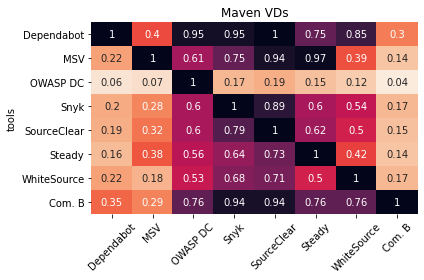

In [74]:
heatmap = sns.heatmap(df, cmap=sns.cm.rocket_r, annot=True, cbar=False)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.title('Maven VDs')
plt.tight_layout()
plt.savefig('mavenvdoverlap.png')

In [75]:
q='''select distinct t.name as tool, d.packageId as id
    from npmAlert nA
    join dependency d on nA.dependencyId = d.id
    join tool t on nA.toolId = t.id'''
fullDf= sql.pd_read_sql(q)

deps = []
tools = []
#deps[i] will be the dep list for tool[i]
for tool, df in fullDf.groupby('tool'):
    tools.append(hm.get(tool,tool))
    s = set(df.id)
    deps.append(s)
arr= [[0 for x in range(len(tools))] for x in range(len(tools))]
for i in range(len(arr)):
    arr[i][i]=1
for i in range(len(tools)):
    for j in range(i+1, len(tools)):
        #how many of i's deps is common with j's?
        total = len(deps[i])
        common = total - len(deps[i]-deps[j])
        ratio = round(common/total,2)
        arr[i][j] = ratio

        #how many of j's deps is common with i's
        total = len(deps[j])
        common = total - len(deps[j]-deps[i])
        ratio = round(common/total,2)
        arr[j][i] = ratio
arr

[[1, 0.25, 0.38, 0.41, 0.5],
 [0.14, 1, 0.83, 0.64, 0.62],
 [0.05, 0.2, 1, 0.32, 0.31],
 [0.14, 0.41, 0.84, 1, 0.87],
 [0.18, 0.4, 0.82, 0.88, 1]]

In [76]:
df = pd.DataFrame(arr)
df.columns = tools
df['tools'] = tools
df = df.set_index('tools')
df

,Dependabot,NPM Audit,OWASP DC,Snyk,WhiteSource
tools,,,,,
Dependabot,1.00,0.25,0.38,0.41,0.50
NPM Audit,0.14,1.00,0.83,0.64,0.62
OWASP DC,0.05,0.20,1.00,0.32,0.31
Snyk,0.14,0.41,0.84,1.00,0.87
WhiteSource,0.18,0.40,0.82,0.88,1.00


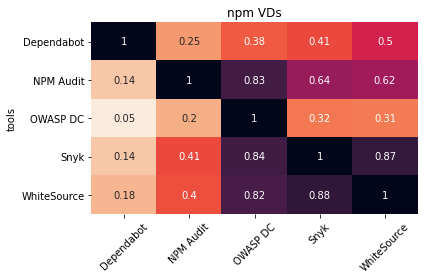

In [77]:
heatmap = sns.heatmap(df, cmap=sns.cm.rocket_r, annot=True, cbar=False)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.title('npm VDs')
plt.tight_layout()
plt.savefig('npmvdoverlap.png')